*Теоретический материал:* https://youtu.be/oPcBGVZ6aSU

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

# Оценка качества обучения нейронной сети в Keras

*Разбор данного раздела:* https://youtu.be/ZNVupJXQisM?t=31

In [ ]:
from tensorflow.keras.models import Sequential # НС прямого распространения
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization # Основные слои
from tensorflow.keras import utils # Утилиты для to_categorical
from tensorflow.keras.preprocessing import image # Для отрисовки изображения
from tensorflow.keras.optimizers import Adam, Adadelta # Алгоритмы оптимизации, для настройки скорости обучения
import numpy as np # Библиотека работы с массивами
import matplotlib.pyplot as plt # Отрисовка изображений
from PIL import Image # Отрисовка изображений
import pandas as pd # Библиотека pandas
from google.colab import files # Импорт файлов
from sklearn.preprocessing import LabelEncoder, StandardScaler # Функции для нормализации данных
from sklearn import preprocessing # Пакет предварительной обработки данных

# Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline


##Загрузка файла

*Разбор данного раздела:* https://youtu.be/ZNVupJXQisM?t=120

## Загрузка данных

In [ ]:
columns = ['Time','TIME','HIGH','LOW','CLOSE','VOLUME'] # Создаем список, в котором будут храниться названия столбцов
index = [0,1,10,100] # Создаем список, в котором будут индексы строк
data = pd.read_csv('EURUSD_PERIOD_M5.csv', delimiter =';') # С помощью метода read_csv загружаем файл EURUSD_M5.csv и записываем данные в data
data.head() # Отображаем наш ДатаФрейм (лучше без использования функции print())

,Time,Open,High,Low,Close,Volume
0,2021.10.04 23:30,1.16216,1.16221,1.16200,1.16205,45.0
1,2021.10.04 23:25,1.16204,1.16216,1.16204,1.16215,56.0
2,2021.10.04 23:20,1.16201,1.16205,1.16201,1.16205,23.0
3,2021.10.04 23:15,1.16226,1.16226,1.16199,1.16201,54.0
4,2021.10.04 23:10,1.16218,1.16227,1.16208,1.16226,67.0


In [ ]:
data['X1'] = data['Close']< data['Open'] 
data

,Time,Open,High,Low,Close,Volume,X1
0,2021.10.04 23:30,1.16216,1.16221,1.16200,1.16205,45.0,True
1,2021.10.04 23:25,1.16204,1.16216,1.16204,1.16215,56.0,False
2,2021.10.04 23:20,1.16201,1.16205,1.16201,1.16205,23.0,False
3,2021.10.04 23:15,1.16226,1.16226,1.16199,1.16201,54.0,True
4,2021.10.04 23:10,1.16218,1.16227,1.16208,1.16226,67.0,False
...,...,...,...,...,...,...,...
65508,2019.11.06 07:55,1.10741,1.10760,1.10740,1.10760,122.0,False
65509,2019.11.06 07:50,1.10711,1.10743,1.10711,1.10741,53.0,False
65510,2019.11.06 07:45,1.10720,1.10723,1.10710,1.10711,64.0,True
65511,2019.11.06 07:40,1.10720,1.10723,1.10718,1.10719,32.0,True


In [ ]:
del data['Time']
data

,Open,High,Low,Close,Volume,X1
0,1.16216,1.16221,1.16200,1.16205,45.0,True
1,1.16204,1.16216,1.16204,1.16215,56.0,False
2,1.16201,1.16205,1.16201,1.16205,23.0,False
3,1.16226,1.16226,1.16199,1.16201,54.0,True
4,1.16218,1.16227,1.16208,1.16226,67.0,False
...,...,...,...,...,...,...
65508,1.10741,1.10760,1.10740,1.10760,122.0,False
65509,1.10711,1.10743,1.10711,1.10741,53.0,False
65510,1.10720,1.10723,1.10710,1.10711,64.0,True
65511,1.10720,1.10723,1.10718,1.10719,32.0,True


In [ ]:
dataset = data.values                 # Берем только значения массива(без индексов)
X = dataset[:,0:5].astype(float)   # Присваиваем им тип данных - float(с плавающей точкой) данным с 0 по 60 колонки
Y = data['X1']                   # Присваеваем значению Y данные из столбца с индексом 60
Y[Y=='False']='0'                       # Если значение элемента столбца равно 'R', присваеваем ему значение '0'
Y[Y=='|True']='1'                       # Если значение элемента столбца равно 'Y', присваеваем ему значение '1'
Y = Y.astype(int)                   # Меняем тип данных столбца на 'int'(целочисленный тип данных)
print(X.shape)                      # Выводим размерность X
print(Y.shape)                      # Выводим размерность Y
print(Y)                            

(65513, 6)
(65513,)
0        1
1        0
2        0
3        1
4        0
        ..
65508    0
65509    0
65510    1
65511    1
65512    1
Name: X1, Length: 65513, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
print(data['X1'].shape) # Размерность данных

(65513,)


In [ ]:
data['X1'].value_counts()

False    33937
True     31576
Name: X1, dtype: int64

## Создание обучающей, проверочной и тестовой выборки

*Разбор данного раздела:* https://youtu.be/ZNVupJXQisM?t=532

In [ ]:
# sklearn - популярная библиотека для машинного обучения
# train_test_split - функция разделения на обучающую и проверочную/тестовую выборку
from sklearn.model_selection import train_test_split


# test_size=0.2 - будет выделено 20% от тренировочных данных 
# shuffle=True - перемешать данные
# x_train - данные для обучения
# x_test - данные для проверки
# y_train - правильные ответы для обучения
# y_test - правильные ответы для проверки
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)    
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(52410, 6)
(13103, 6)
(52410,)
(13103,)


## Создание нейронной сети

*Разбор данного раздела:* https://youtu.be/ZNVupJXQisM?t=751

In [ ]:
# Функция пересоздаёт пустую сеть
def createModel():

  # Создаем сеть
  model = Sequential()

  # Добавляем слои
  model.add(Dense(60, input_dim=5, activation='relu'))
  model.add(Dense(30,  activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  # Компилируем сеть
  model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

  return model # Возвращаем созданную сеть

In [ ]:
# Создаём пустую сеть при помощи функции createModel()
model = createModel()

# Обучаем сеть
model.fit(x_train,         
          y_train,         
          batch_size=8,    # Размер батча
          epochs=100,      # Количество эпох
          verbose=1)       # Выводить процесс обучения на каждой эпохе

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
6552/6552 [==============================] - 10s 1ms/step - loss: 0.1771 - accuracy: 0.9508
Epoch 2/100
6552/6552 [==============================] - 9s 1ms/step - loss: 0.0441 - accuracy: 0.9948
Epoch 3/100
6552/6552 [==============================] - 9s 1ms/step - loss: 0.0506 - accuracy: 0.9969
Epoch 4/100
6552/6552 [==============================] - 9s 1ms/step - loss: 1.9440e-05 - accuracy: 1.0000
Epoch 5/100
6552/6552 [==============================] - 9s 1ms/step - loss: 0.0226 - accuracy: 0.9979
Epoch 6/100
6552/6552 [==============================] - 9s 1ms/step - loss: 0.0146 - accuracy: 0.9976
Epoch 7/100
6552/6552 [==============================] - 9s 1ms/step - loss: 0.0085 - accuracy: 0.9990
Epoch 8/100
6552/6552 [==============================] - 10s 1ms/step - loss: 0.0064 - accuracy: 0.9987
Epoch 9/100
6552/6552 [==============================] - 9s 1ms/step - loss: 1.1016e-05 - accuracy: 1.0000
Epoch 10/100
6552/6552 [==============================] - 9s 1m

In [ ]:
model.save_weights('model.h5')
model.load_weights('model.h5')


### Варианты создания проверочной выборки

*Разбор данного раздела:* https://youtu.be/ZNVupJXQisM?t=895


**validation_split**

In [ ]:
# Создаём пустую сеть
model = createModel()

# Обучаем сеть
model.fit(x_train, 
          y_train,
          batch_size=8, 
          epochs=100,
          validation_split=0.2, # Указываем 20% случайных примеров для проверочной выборки
          verbose=1)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5241/5241 [==============================] - 9s 2ms/step - loss: 0.2185 - accuracy: 0.9349 - val_loss: 3.3026e-04 - val_accuracy: 1.0000
Epoch 2/100
5241/5241 [==============================] - 8s 2ms/step - loss: 1.5384e-04 - accuracy: 1.0000 - val_loss: 3.3573e-05 - val_accuracy: 1.0000
Epoch 3/100
5241/5241 [==============================] - 8s 2ms/step - loss: 0.0476 - accuracy: 0.9947 - val_loss: 3.8138e-04 - val_accuracy: 1.0000
Epoch 4/100
5241/5241 [==============================] - 8s 2ms/step - loss: 5.5088e-05 - accuracy: 1.0000 - val_loss: 1.2522e-05 - val_accuracy: 1.0000
Epoch 5/100
5241/5241 [==============================] - 8s 2ms/step - loss: 0.0353 - accuracy: 0.9944 - val_loss: 2.4755e-04 - val_accuracy: 1.0000
Epoch 6/100
5241/5241 [==============================] - 8s 2ms/step - loss: 4.1113e-05 - accuracy: 1.0000 - val_loss: 3.0866e-06 - val_accuracy: 1.0000
Epoch 7/100
5241/5241 [==============================] - 8s 2ms/step - loss: 0.0141 - accuracy: 0.9982 - v

**validation_data**

In [ ]:
n_val = 40                  # Указываем 40 примеров в проверочную выборку
x_len = x_train.shape[0]    # Запоминаем размер всей выборки целиком
model = createModel()       # Создаём пустую сеть

# Обучаем сеть
model.fit(x_train[:x_len-n_val], # Берём все до индекса 166 - 40 = 126
          y_train[:x_len-n_val], 
          batch_size=8, 
          epochs=100,
          # Прямо указываем данные для проверочной выборки
          # Берём от индекса 126 до конца = 40 примеров
          validation_data=(x_train[x_len-n_val:], y_train[x_len-n_val:]), 
          verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
6547/6547 [==============================] - 10s 1ms/step - loss: 0.1321 - accuracy: 0.9606 - val_loss: 2.7791e-04 - val_accuracy: 1.0000
Epoch 2/100
6547/6547 [==============================] - 9s 1ms/step - loss: 0.0222 - accuracy: 0.9964 - val_loss: 4.0905e-07 - val_accuracy: 1.0000
Epoch 3/100
6547/6547 [==============================] - 10s 1ms/step - loss: 0.0316 - accuracy: 0.9963 - val_loss: 1.2246e-05 - val_accuracy: 1.0000
Epoch 4/100
6547/6547 [==============================] - 9s 1ms/step - loss: 3.3286e-06 - accuracy: 1.0000 - val_loss: 1.9813e-07 - val_accuracy: 1.0000
Epoch 5/100
6547/6547 [==============================] - 9s 1ms/step - loss: 1.0287e-07 - accuracy: 1.0000 - val_loss: 2.2541e-08 - val_accuracy: 1.0000
Epoch 6/100
6547/6547 [==============================] - 10s 1ms/step - loss: 0.0211 - accuracy: 0.9974 - val_loss: 7.1364e-06 - val_accuracy: 1.0000
Epoch 7/100
6547/6547 [==============================] - 9s 1ms/step - loss: 2.2181e-06 - accur

**sklearn train_test_split**

In [ ]:
from sklearn.model_selection import train_test_split

# Разбиваем датасет на тренировочный и тестовый при помощи функции train_test_split
# x_train_new - новые обучающие данные x
# x_val - новые обучающие данные y
# y_train_new - проверочные данные x
# y_val - проверочные данные y
# test_size=0.2 - 20% на проверочную выборку
x_train_new, x_val, y_train_new, y_val = train_test_split(x_train,
                                                          y_train,
                                                          test_size=0.2)

# Выводим размеры полученных выборок
print(x_train_new.shape)
print(x_val.shape)
print(y_train_new.shape)
print(y_val.shape)

# Создаём пустую сеть
model = createModel()
# Обучаем сеть
model.fit(x_train_new, 
          y_train_new, 
          batch_size=8, 
          epochs=100,
          validation_data=(x_val, y_val), # Указываем проверочную выборку
          verbose=1)

(41928, 6)
(10482, 6)
(41928,)
(10482,)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
5241/5241 [==============================] - 9s 2ms/step - loss: 0.2101 - accuracy: 0.9414 - val_loss: 3.7999e-04 - val_accuracy: 1.0000
Epoch 2/100
5241/5241 [==============================] - 8s 2ms/step - loss: 1.6435e-04 - accuracy: 1.0000 - val_loss: 1.0838e-05 - val_accuracy: 1.0000
Epoch 3/100
5241/5241 [==============================] - 8s 2ms/step - loss: 0.0459 - accuracy: 0.9957 - val_loss: 2.0657e-04 - val_accuracy: 1.0000
Epoch 4/100
5241/5241 [==============================] - 8s 2ms/step - loss: 1.1839e-04 - accuracy: 1.0000 - val_loss: 5.1013e-06 - val_accuracy: 1.0000
Epoch 5/100
5241/5241 [==============================] - 8s 2ms/step - loss: 0.0429 - accuracy: 0.9954 - val_loss: 0.0104 - val_accuracy: 0.9964
Epoch 6/100
5241/5241 [==============================] - 8s 2ms/step - loss: 5.3023e-04 - accuracy: 0.9999 - val_loss: 2.6907e-05 - val_accuracy: 1.0000
Epoch 7/100
5241/5241 [==============================] - 8s 2ms/step - loss: 0.0167 - accuracy: 0.

## Проверяем качество обучения на тестовом наборе данных

*Разбор данного раздела:* https://youtu.be/ZNVupJXQisM?t=1542

In [ ]:
# Вычисляем результаты сети на тестовом наборе
scores = model.evaluate(x_test, y_test, verbose=1)

# scores состоит из двух знанчений
# scores[0] - loss сети на тестовой выборке
# scores[1] - процент правильно распознанных примеров на тестовой выборке
print(scores)
print("Доля верных ответов на тестовых данных, в процентах: ", round(scores[1] * 100, 4), "%", sep="")

410/410 [==============================] - 0s 1ms/step - loss: 4.1166e-12 - accuracy: 1.0000
[4.116580774177203e-12, 1.0]
Доля верных ответов на тестовых данных, в процентах: 100.0%


## Визуализация качества обучения

*Разбор данного раздела:* https://youtu.be/ZNVupJXQisM?t=1683


In [ ]:
# Создаём пустую сеть
model = createModel() 

# Обучаем сеть
history = model.fit(x_train, 
                    y_train, 
                    batch_size=8, 
                    epochs=100,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


5241/5241 [==============================] - 9s 2ms/step - loss: 0.2368 - accuracy: 0.9318 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 2/100
5241/5241 [==============================] - 8s 2ms/step - loss: 2.9482e-04 - accuracy: 1.0000 - val_loss: 7.3244e-06 - val_accuracy: 1.0000
Epoch 3/100
5241/5241 [==============================] - 8s 2ms/step - loss: 2.1196e-06 - accuracy: 1.0000 - val_loss: 3.2331e-07 - val_accuracy: 1.0000
Epoch 4/100
5241/5241 [==============================] - 8s 2ms/step - loss: 9.4488e-08 - accuracy: 1.0000 - val_loss: 1.6273e-08 - val_accuracy: 1.0000
Epoch 5/100
5241/5241 [==============================] - 8s 2ms/step - loss: 0.0163 - accuracy: 0.9983 - val_loss: 2.8970e-05 - val_accuracy: 1.0000
Epoch 6/100
5241/5241 [==============================] - 8s 2ms/step - loss: 7.8523e-06 - accuracy: 1.0000 - val_loss: 1.1133e-06 - val_accuracy: 1.0000
Epoch 7/100
5241/5241 [==============================] - 8s 2ms/step - loss: 4.5034e-07 - accuracy: 1.0000

Состав словаря History

In [ ]:
# Ключи в структуре history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


###  'loss' - значения ошибки на обучающем наборе данных
###  'accuracy' - точность на обучающем наборе данных
###  'val_loss' - значения ошибки на проверочном наборе данных
###  'val_accuracy' - точность на проверочном наборе данных

Печатаем значения ошибки на обучающем наборе данных

In [ ]:
# Значения loss на обучающей выборке по эпохам
history.history['loss']

[0.23678608238697052,
 0.0002948172914329916,
 2.1195944555074675e-06,
 9.448766036257439e-08,
 0.016340777277946472,
 7.852346243453212e-06,
 4.503412469603063e-07,
 3.8712066441348725e-08,
 0.0323486253619194,
 7.671380330975808e-08,
 3.22752202741583e-09,
 3.081808808147457e-09,
 3.063081344123475e-09,
 3.040500740070229e-09,
 2.9449822580573937e-09,
 0.01907634176313877,
 0.015514155849814415,
 0.02692270278930664,
 2.370538140894496e-06,
 6.246445991564542e-07,
 0.01346631906926632,
 2.1023838669975703e-08,
 0.015122517943382263,
 1.8990100159044232e-07,
 6.15098283418547e-09,
 5.831485072604892e-09,
 5.002432690304204e-09,
 0.01658639684319496,
 2.8900192461378538e-08,
 3.4587921415862866e-09,
 2.4064947812263426e-09,
 2.0501460529231963e-09,
 0.009744657203555107,
 3.900963552183612e-09,
 2.270379662050459e-09,
 9.454113047979718e-10,
 6.091089299609109e-10,
 0.01044558547437191,
 2.581666365131241e-07,
 6.555870868396596e-08,
 5.3332525062899094e-09,
 3.0667401951234297e-09,
 2

Печатаем долю правильных ответов на проверочном наборе данных

In [ ]:
# Значения точности распознавания на проверочной выборке по эпохам
val_acc = history.history['val_accuracy']
for i in range(len(val_acc)):
  print("Эпоха: ", i, " точность: ", round(100*val_acc[i], 1), "%", sep="")
  # round - округление
  # sep="" - убрать стандартный разделитель пробел при выводе строки

Эпоха: 0 точность: 100.0%
Эпоха: 1 точность: 100.0%
Эпоха: 2 точность: 100.0%
Эпоха: 3 точность: 100.0%
Эпоха: 4 точность: 100.0%
Эпоха: 5 точность: 100.0%
Эпоха: 6 точность: 100.0%
Эпоха: 7 точность: 100.0%
Эпоха: 8 точность: 100.0%
Эпоха: 9 точность: 100.0%
Эпоха: 10 точность: 100.0%
Эпоха: 11 точность: 100.0%
Эпоха: 12 точность: 100.0%
Эпоха: 13 точность: 100.0%
Эпоха: 14 точность: 100.0%
Эпоха: 15 точность: 100.0%
Эпоха: 16 точность: 100.0%
Эпоха: 17 точность: 100.0%
Эпоха: 18 точность: 100.0%
Эпоха: 19 точность: 89.6%
Эпоха: 20 точность: 100.0%
Эпоха: 21 точность: 100.0%
Эпоха: 22 точность: 100.0%
Эпоха: 23 точность: 100.0%
Эпоха: 24 точность: 100.0%
Эпоха: 25 точность: 100.0%
Эпоха: 26 точность: 100.0%
Эпоха: 27 точность: 100.0%
Эпоха: 28 точность: 100.0%
Эпоха: 29 точность: 100.0%
Эпоха: 30 точность: 100.0%
Эпоха: 31 точность: 100.0%
Эпоха: 32 точность: 100.0%
Эпоха: 33 точность: 100.0%
Эпоха: 34 точность: 100.0%
Эпоха: 35 точность: 100.0%
Эпоха: 36 точность: 100.0%
Эпоха: 37 то

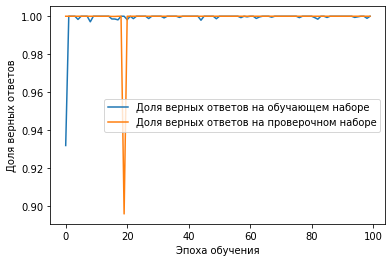

In [ ]:
# Выводим график точности на обучающей выборке
# label - имя графика в легенде
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')

# Выводим график точности на проверочной выборке
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')

# Выводим подписи осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Выводим легенду
plt.legend()
plt.show()

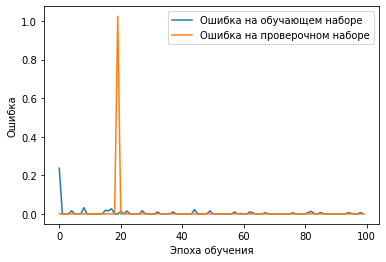

In [ ]:
# Выводим графики ошибки
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

## Слой Dropout

*Разбор данного раздела:* https://youtu.be/ZNVupJXQisM?t=1879


In [ ]:
# Создаём сеть
model = Sequential()
model.add(Dropout(0.3, input_shape=(5,)))    # 0.3 означает, что 30% нейронов будут 'выключены'
model.add(Dense(60, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# Компилируем сеть
# lr=0.001 - размер шага обучения
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Обучаем сеть
history = model.fit(x_train, 
                      y_train, 
                      batch_size=8, 
                      epochs=100,
                      validation_split=0.2, 
                      verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
5241/5241 [==============================] - 9s 2ms/step - loss: 1.0804 - accuracy: 0.6235 - val_loss: 0.6705 - val_accuracy: 0.5754
Epoch 2/100
5241/5241 [==============================] - 8s 2ms/step - loss: 0.4421 - accuracy: 0.7934 - val_loss: 0.1499 - val_accuracy: 1.0000
Epoch 3/100
5241/5241 [==============================] - 9s 2ms/step - loss: 0.3749 - accuracy: 0.8402 - val_loss: 0.1411 - val_accuracy: 1.0000
Epoch 4/100
5241/5241 [==============================] - 9s 2ms/step - loss: 0.3562 - accuracy: 0.8501 - val_loss: 0.1317 - val_accuracy: 1.0000
Epoch 5/100
5241/5241 [==============================] - 8s 2ms/step - loss: 0.3627 - accuracy: 0.8485 - val_loss: 0.1316 - val_accuracy: 1.0000
Epoch 6/100
5241/5241 [==============================] - 9s 2ms/step - loss: 0.3599 - accuracy: 0.8494 - val_loss: 0.1310 - val_accuracy: 1.0000
Epoch 7/100
5241/5241 [==============================] - 8s 2ms/step - loss: 0.3567 - accuracy: 0.8506 - val_loss: 0.1972 - val_ac

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 6)                 0         
_________________________________________________________________
dense_15 (Dense)             (None, 60)                420       
_________________________________________________________________
dropout_1 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 30)                1830      
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 31        
Total params: 2,281
Trainable params: 2,281
Non-trainable params: 0
____________________________________________________

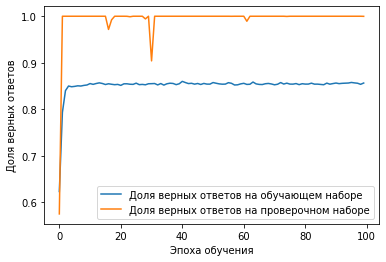

In [ ]:
# Выводим график точности на обучающей выборке
# label - имя графика в легенде
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')

# Выводим график точности на проверочной выборке
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')

# Выводим подписи осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Выводим легенду
plt.legend()
plt.show()

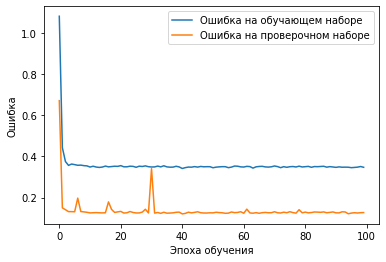

In [ ]:
# Выводим графики ошибки
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

## Нормализация

*Разбор данного раздела:* https://youtu.be/ZNVupJXQisM?t=2134

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
5241/5241 [==============================] - 11s 2ms/step - loss: 0.0135 - accuracy: 0.9952 - val_loss: 3.5641e-07 - val_accuracy: 1.0000
Epoch 2/100
5241/5241 [==============================] - 10s 2ms/step - loss: 0.0080 - accuracy: 0.9965 - val_loss: 1.2398e-07 - val_accuracy: 1.0000
Epoch 3/100
5241/5241 [==============================] - 10s 2ms/step - loss: 0.0082 - accuracy: 0.9962 - val_loss: 5.4153e-07 - val_accuracy: 1.0000
Epoch 4/100
5241/5241 [==============================] - 10s 2ms/step - loss: 0.0081 - accuracy: 0.9960 - val_loss: 1.9775e-07 - val_accuracy: 1.0000
Epoch 5/100
5241/5241 [==============================] - 10s 2ms/step - loss: 0.0059 - accuracy: 0.9972 - val_loss: 1.0810e-07 - val_accuracy: 1.0000
Epoch 6/100
5241/5241 [==============================] - 10s 2ms/step - loss: 0.0065 - accuracy: 0.9974 - val_loss: 3.3453e-08 - val_accuracy: 1.0000
Epoch 7/100
5241/5241 [==============================] - 10s 2ms/step - loss: 0.0064 - accuracy: 0.9

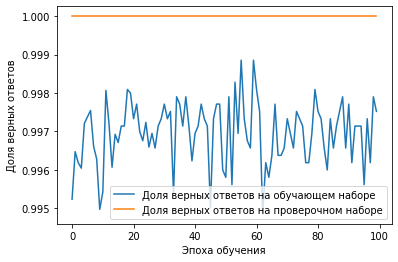

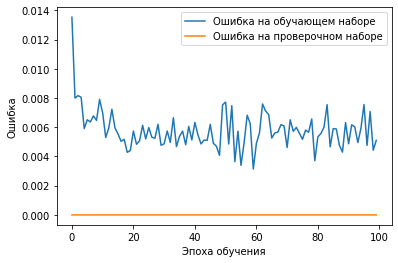

In [ ]:
model = Sequential()

# Добавляем слой пакетной нормализации
# Теперь input_shape=(60, ) надо указывать в нём
# А не в первом полносвязном слое
model.add(BatchNormalization(input_shape=(5, )))
model.add(Dense(60, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

history = model.fit(x_train, 
                    y_train, 
                    batch_size=8, 
                    epochs=100,
                    validation_split=0.2,
                    verbose=1)

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#Выводим графики ошибки
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
5241/5241 [==============================] - 11s 2ms/step - loss: 0.3499 - accuracy: 0.8387 - val_loss: 0.5872 - val_accuracy: 0.7328
Epoch 2/100
5241/5241 [==============================] - 10s 2ms/step - loss: 0.1899 - accuracy: 0.9296 - val_loss: 0.0435 - val_accuracy: 0.9883
Epoch 3/100
5241/5241 [==============================] - 10s 2ms/step - loss: 0.1773 - accuracy: 0.9365 - val_loss: 0.0407 - val_accuracy: 0.9994
Epoch 4/100
5241/5241 [==============================] - 10s 2ms/step - loss: 0.1236 - accuracy: 0.9602 - val_loss: 0.0028 - val_accuracy: 0.9999
Epoch 5/100
5241/5241 [==============================] - 10s 2ms/step - loss: 0.1090 - accuracy: 0.9652 - val_loss: 0.0071 - val_accuracy: 0.9987
Epoch 6/100
5241/5241 [==============================] - 10s 2ms/step - loss: 0.0928 - accuracy: 0.9713 - val_loss: 0.0577 - val_accuracy: 0.9812
Epoch 7/100
5241/5241 [==============================] - 10s 2ms/step - loss: 0.0884 - accuracy: 0.9743 - val_loss: 0.0013 -

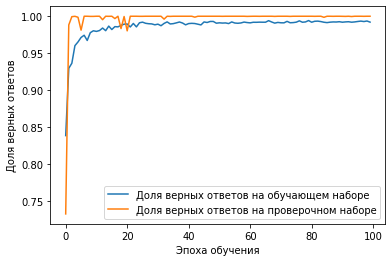

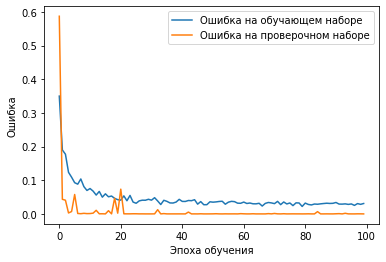

In [ ]:
model = Sequential()

# Добавляем слой пакетной нормализации
# Теперь input_shape=(784, ) надо указывать в нём
# А не в первом полносвязном слое
model.add(Dense(60, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(30, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

history = model.fit(x_train, 
                    y_train, 
                    batch_size=8, 
                    epochs=100,
                    validation_split=0.2,
                    verbose=1)

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

# Выводим графики ошибки
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

# Предсказание цен машин с Юлы

*Разбор данного раздела:* https://youtu.be/ZNVupJXQisM?t=2386

In [ ]:
# Загружаем файлы
files.upload()
!ls # Выводим содержимое корневой папки

In [ ]:
# Считываем csv с помощью pandas
cars = pd.read_csv('cars_new.csv', sep=',')
cars[:5] # Выводим первые 5 машин 

In [ ]:
print(cars.values.shape)

In [ ]:
# Создаём словарь поле - его индекс
def create_dict(s):
  ret = {}                          # Создаём пустой словарь
  for _id, name in enumerate(s):    # Проходим по всем парам - id и название
    ret.update({name: _id})         # Добавляем в словарь
  return ret

# Функция преобразования в one hot encoding
def to_ohe(value, d):
  arr = [0] * len(d)
  arr[d[value]] = 1
  return arr

In [ ]:
# Создаём словари по всем текстовым колонкам
marks_dict = create_dict(set(cars['mark']))
models_dict = create_dict(set(cars['model']))
bodies_dict = create_dict(set(cars['body']))
kpps_dict = create_dict(set(cars['kpp']))
fuels_dict = create_dict(set(cars['fuel']))

# Запоминаем цены
prices = np.array(cars['price'], dtype=np.float)

# Запоминаем числовые параметры
# и нормируем
years = preprocessing.scale(cars['year'])
mileages = preprocessing.scale(cars['mileage'])
volumes = preprocessing.scale(cars['volume'])
powers = preprocessing.scale(cars['power'])

In [ ]:
print(marks_dict)

In [ ]:
years.mean()

In [ ]:
years.std()

In [ ]:
print(powers)

In [ ]:
# Создаём пустую обучающую выборку
x_train = []
y_train = []

# Проходам по всем машинам
for _id, car in enumerate(np.array(cars)):
  # В y_train добавляем цену
  y_train.append(prices[_id])
  
  # В x_train объединяем все параметры
  # Категорийные параметры добавляем в виде ohe
  # Числовые параметры добавляем напрямую
  x_tr = to_ohe(car[0], marks_dict) + \
        to_ohe(car[1], models_dict) + \
        to_ohe(car[5], bodies_dict) + \
        to_ohe(car[6], kpps_dict) + \
        to_ohe(car[7], fuels_dict) + \
        [years[_id]] + \
        [mileages[_id]] + \
        [volumes[_id]] + \
        [powers[_id]]
  
  # Добавляем текущую строку в общий x_train
  x_train.append(x_tr)

# Превращаем лист в numpy.array
x_train = np.array(x_train, dtype=np.float)
y_train = np.array(y_train, dtype=np.float)

In [ ]:
# Выводим размеры выборок
print(x_train.shape)
print(y_train.shape)

In [ ]:
# Выводим один x_train
print(x_train[0,:20])
print(x_train[0,-20:])

In [ ]:
# Выводим y_train
print(y_train[:10])

In [ ]:
# Нормализуем y_train
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1,1)).flatten()

# y_train.reshape(-1,1) добавляет одну размерность
# Это нужно потому, что y_scaler.fit_transform
# Требует двумерны вектор, массив примеров, которые надо нормализовать
# Он не умеет работать с одним примеров
# Поэтому мы делаем массив из одного примера
# На выходе он так же выдаёт массив примеров
# Но нам нужен только первый пример
# Поэтому мы делаем flatten() - уменьшение размерности

In [ ]:
y_train_scaled.shape

In [ ]:
# Выводим базовый и нормированный y_train
print(y_train[:10])
print(y_train_scaled[:10])

In [ ]:
model_ula = Sequential()
model_ula.add(Dense(300, activation = 'relu', input_shape = x_train.shape[1:]))
model_ula.add(Dense(100, activation = 'relu'))
model_ula.add(Dense(1))
model_ula.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])
# training
model_ula.fit(x_train, y_train_scaled, epochs = 20, batch_size = 32, validation_split = 0.1)

predict = model_ula.predict(x_test)


# Глоссарий

**Типы выборок:**

*   *Обучающая выборка* - основной набор данных, на котором происходит обучение нейронной сети
*   *Проверочная выборка* - набор данных, на котором отслеживается качество работы сети в процессе обучения
*   *Тестовая выборка* - контрольный набор данных, на котором проверяется качество работы обученной сети



**Способы формирования проверочной выборки:**


*   validation_split - указываем процент от обучающей выборки, который будет использоваться в качестве проверочной
*   validation_data - указываем готовые наборы данных, которые будут использоваться в качестве проверочной выборки

**Переобучение сети** - ситуация, при которой сеть "заучила" исходную обучающую выборку и не способна производить обобщение данных (верно распознавать данные из проверочных и тестовых наборов)

**Способы преодоления переобучения:**


*   Dropout - принудительное "отключение" случайного числа нейронов
*   BatchNormalization - нормализация данных на выходе слоя

**StandardScaler** - класс нормализации данных (приводит переданный набор числовых данных к нормальному распределению)

